In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os import listdir, makedirs
import matplotlib.pyplot as plt
from keras import layers, models, optimizers, regularizers, losses
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.datasets import mnist
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')
print(os.listdir("/home/yaagocruuz/Documentos/git/Topicos3/Trabalho Final/"))

/home/yaagocruuz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['retrain.py', '.ipynb_checkpoints', 'sem_finetuning.ipynb', 'dataset', 'predict', 'Trabalho Final.ipynb']


In [2]:
RESOLUTION = 139
BATCH_SIZE = 64


data_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,
                                  horizontal_flip=True, validation_split=0.20)

train_generator = data_datagen.flow_from_directory(
        "dataset/",
        classes=['Caroline_Kennedy', 'Edward_Moore_Kennedy',
                 'Eunice_Kennedy_Shriver','Jacqueline_Lee_Bouvier',
                 'John_Fitzgerald_Kennedy', 'John_F_Kennedy_Jr',
                 'Joseph_P_Kennedy_Sr', 'Outros', 
                 'Robert_Francis_Kennedy','Rose_Elizabeth_Fitzgerald', 
                 'Rosemary_Kenndy'],
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_generator = data_datagen.flow_from_directory(
        "dataset/",
        classes=['Caroline_Kennedy', 'Edward_Moore_Kennedy',
                 'Eunice_Kennedy_Shriver','Jacqueline_Lee_Bouvier',
                 'John_Fitzgerald_Kennedy', 'John_F_Kennedy_Jr',
                 'Joseph_P_Kennedy_Sr', 'Outros', 
                 'Robert_Francis_Kennedy','Rose_Elizabeth_Fitzgerald', 
                 'Rosemary_Kenndy'],
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 228 images belonging to 11 classes.
Found 53 images belonging to 11 classes.


In [3]:
train_generator.class_indices

{'Caroline_Kennedy': 0,
 'Edward_Moore_Kennedy': 1,
 'Eunice_Kennedy_Shriver': 2,
 'Jacqueline_Lee_Bouvier': 3,
 'John_Fitzgerald_Kennedy': 4,
 'John_F_Kennedy_Jr': 5,
 'Joseph_P_Kennedy_Sr': 6,
 'Outros': 7,
 'Robert_Francis_Kennedy': 8,
 'Rose_Elizabeth_Fitzgerald': 9,
 'Rosemary_Kenndy': 10}

In [4]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(139, 139, 3))

In [5]:
def inceptionV3_pretrained_model(model_inceptionV3):
  
    model = Sequential()
    model.add(model_inceptionV3)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(11, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

    return model

In [6]:
final = inceptionV3_pretrained_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_2 (Dense)              (None, 11)                2827      
Total params: 26,524,459
Trainable params: 26,490,027
Non-trainable params: 34,432
_________________________________________________________________


In [7]:
N_TRAIN = 228
N_VAL = 53

history = final.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // BATCH_SIZE),
        epochs=100,
        validation_data=val_generator,
        validation_steps=(N_VAL // BATCH_SIZE) 
    )

Epoch 1/100
3/3 [==============================] - 57s 19s/step - loss: 2.4697 - acc: 0.1406 - val_loss: 2.2499 - val_acc: 0.2264
Epoch 2/100
3/3 [==============================] - 30s 10s/step - loss: 2.1401 - acc: 0.2608 - val_loss: 2.0694 - val_acc: 0.2453
Epoch 3/100
3/3 [==============================] - 35s 12s/step - loss: 2.1159 - acc: 0.2687 - val_loss: 2.1268 - val_acc: 0.2453
Epoch 4/100
3/3 [==============================] - 40s 13s/step - loss: 2.0309 - acc: 0.2917 - val_loss: 2.1404 - val_acc: 0.2453
Epoch 5/100
3/3 [==============================] - 34s 11s/step - loss: 1.9058 - acc: 0.3454 - val_loss: 1.9241 - val_acc: 0.3396
Epoch 6/100
3/3 [==============================] - 40s 13s/step - loss: 1.8523 - acc: 0.3750 - val_loss: 2.0128 - val_acc: 0.3208
Epoch 7/100
3/3 [==============================] - 31s 10s/step - loss: 1.7319 - acc: 0.3926 - val_loss: 1.9161 - val_acc: 0.3962
Epoch 8/100
3/3 [==============================] - 40s 13s/step - loss: 1.6825 - acc: 0.46

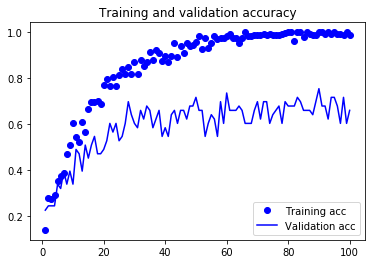

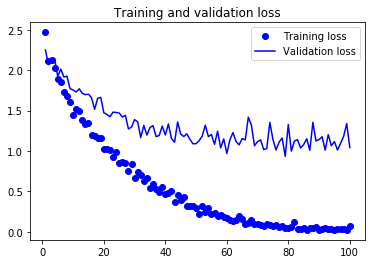

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/home/yaagocruuz/Documentos/git/Topicos3/Trabalho Final/predict/*.jpg'): #assuming gif
    img=image.load_img(filename, target_size=(139,139))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    image_list.append(x)

In [11]:
train_generator.class_indices

{'Caroline_Kennedy': 0,
 'Edward_Moore_Kennedy': 1,
 'Eunice_Kennedy_Shriver': 2,
 'Jacqueline_Lee_Bouvier': 3,
 'John_Fitzgerald_Kennedy': 4,
 'John_F_Kennedy_Jr': 5,
 'Joseph_P_Kennedy_Sr': 6,
 'Outros': 7,
 'Robert_Francis_Kennedy': 8,
 'Rose_Elizabeth_Fitzgerald': 9,
 'Rosemary_Kenndy': 10}

In [12]:
label_list = ['Caroline_Kennedy : 0', 'Edward_Moore_Kennedy : 1',
              'Eunice_Kennedy_Shriver : 2','Jacqueline_Lee_Bouvier : 3',
              'John_Fitzgerald_Kennedy : 4', 'John_F_Kennedy_Jr : 5',
              'Joseph_P_Kennedy_Sr : 6', 'Outros : 7', 
              'Robert_Francis_Kennedy : 8','Rose_Elizabeth_Fitzgerald : 9', 
              'Rosemary_Kenndy : 10']

for i in range(0,len(image_list)):
    print('Real : ', label_list[i])
    print('Pred : ', final.predict_classes(image_list[i]))

Real :  Caroline_Kennedy : 0
Pred :  [9]
Real :  Edward_Moore_Kennedy : 1
Pred :  [9]
Real :  Eunice_Kennedy_Shriver : 2
Pred :  [9]
Real :  Jacqueline_Lee_Bouvier : 3
Pred :  [3]
Real :  John_Fitzgerald_Kennedy : 4
Pred :  [9]
Real :  John_F_Kennedy_Jr : 5
Pred :  [6]
Real :  Joseph_P_Kennedy_Sr : 6
Pred :  [9]
Real :  Outros : 7
Pred :  [5]
Real :  Robert_Francis_Kennedy : 8
Pred :  [6]
Real :  Rose_Elizabeth_Fitzgerald : 9
Pred :  [3]
Real :  Rosemary_Kenndy : 10
Pred :  [2]
